## Importing relevant libraries and loading the dataset

In [1]:
import tensorflow as tf
import pandas as PD
import seaborn as sns
import re
from word cloud import WordCloud
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [3]:
df.rename(columns = {'v1':'label', 'v2': 'text'}, inplace = True)

In [4]:
df.head()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#Replacing 'spam' with 0 and 'ham' with 1
df['label'] = df['label'].replace({'spam': 0, 'ham': 1})

In [6]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [7]:
df.head()

,label,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


## Data Cleaning

In [8]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

In [9]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [10]:
df.head(10)

,label,text,cleaned_text
0,1,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,1,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,1,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
5,0,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been weeks now ...
6,1,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...
7,1,As per your request 'Melle Melle (Oru Minnamin...,as per your request melle melle oru minnaminun...
8,0,WINNER!! As a valued network customer you have...,winner as a valued network customer you have b...
9,0,Had your mobile 11 months or more? U R entitle...,had your mobile months or more u r entitled t...


## Basic EDA

In [11]:
print(f"Total Text Messages: {len(df)}")
print(df['label'].value_counts())  # Check sentiment distribution

Total Text Messages: 5572
label
1    4825
0     747
Name: count, dtype: int64


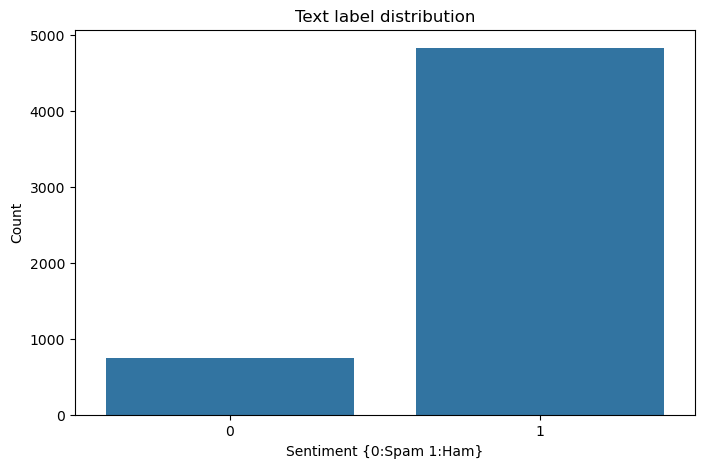

In [12]:
# Visualize the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='label')
plt.title('Text label distribution')
plt.xlabel('Sentiment {0:Spam 1:Ham}')
plt.ylabel('Count')
plt.show()

In [13]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

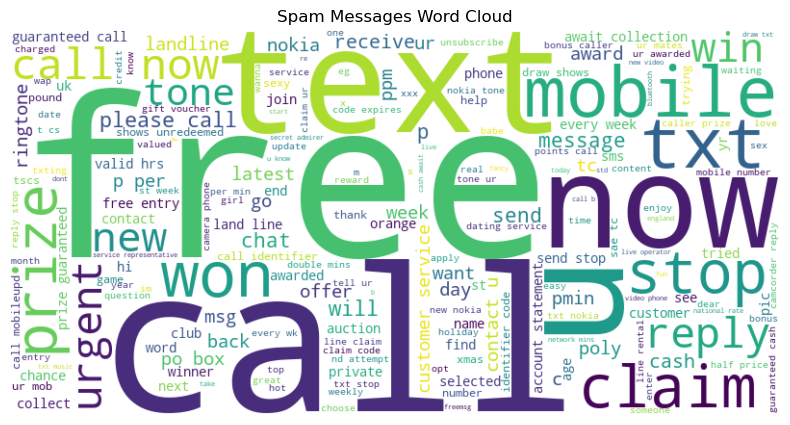

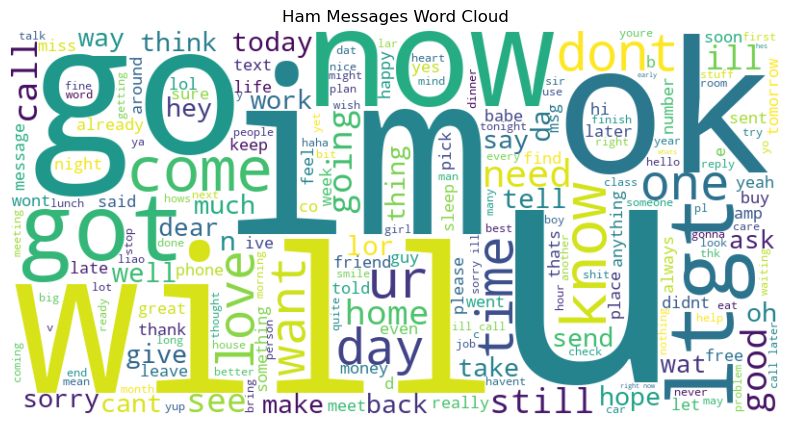

In [14]:
# Generate word clouds for spam messages and ham messages
spam_messages = df[df['label'] == 0]['cleaned_text']
ham_messages = df[df['label'] == 1]['cleaned_text']

generate_wordcloud(spam_messages, 'Spam Messages Word Cloud')
generate_wordcloud(ham_messages, 'Ham Messages Word Cloud')

## Data Preprocessing

In [15]:
train_df, test_df= train_test_split(df, test_size=0.3,random_state= 45)

In [16]:
len(train_df), len(test_df)

(3900, 1672)

In [17]:
print("The Sentiment Distribution for the training set is: ")
print(train_df['label'].value_counts())
print("-" * 60)
print("The Sentiment Distribution for the test set is: ")
print(test_df['label'].value_counts())

The Sentiment Distribution for the training set is: 
label
1    3398
0     502
Name: count, dtype: int64
------------------------------------------------------------
The Sentiment Distribution for the test set is: 
label
1    1427
0     245
Name: count, dtype: int64


In [18]:
#Loading in the cleaned text as features and their respective targets as labels for training the model
training_sentences = train_df['cleaned_text'].tolist()
testing_sentences = test_df['cleaned_text'].tolist()
training_labels = train_df['label'].tolist()
testing_labels = test_df['label'].tolist()

In [44]:
print(f'The first ten training messages are : {training_sentences[:10]}')
print('\n')
print(f'The first ten training labels are: {training_labels[:10]}')

The first ten training messages are : ['i know she called me', 'i like you peoples very much but am very shy pa', 'is it ok if i stay the night here xavier has a sleeping bag and im getting tired', 'derp which is worse a dude who always wants to party or a dude who files a complaint about the three drug abusers he lives with', 'this is all just creepy and crazy to me', 'i called and said all to himthen he have to choose this future', 'great i hope you like your man well endowed i am  ltgt  inches', 'two teams waiting for some players', 'aight you close by or still down around alexs place', 'so do you have samus shoulders yet']


The first ten training labels are: [1 1 1 1 1 1 1 1 1 1]


In [20]:
#Relevant hyperparameters for training
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 600000

In [21]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [22]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Building the Model (Utilizing Bidirectional LSTMs)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           16000     
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         41472     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 102,913
Trainable params: 102,913
Non-trai

## Training the Model and analyzing it's performance

In [27]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/10
122/122 [==============================] - 23s 131ms/step - loss: 0.3996 - accuracy: 0.8659 - val_loss: 0.2357 - val_accuracy: 0.9139
Epoch 2/10
122/122 [==============================] - 14s 112ms/step - loss: 0.0906 - accuracy: 0.9738 - val_loss: 0.0761 - val_accuracy: 0.9755
Epoch 3/10
122/122 [==============================] - 14s 117ms/step - loss: 0.0460 - accuracy: 0.9882 - val_loss: 0.1046 - val_accuracy: 0.9761
Epoch 4/10
122/122 [==============================] - 15s 127ms/step - loss: 0.0327 - accuracy: 0.9921 - val_loss: 0.0978 - val_accuracy: 0.9809
Epoch 5/10
122/122 [==============================] - 16s 128ms/step - loss: 0.0254 - accuracy: 0.9936 - val_loss: 0.0868 - val_accuracy: 0.9779
Epoch 6/10
122/122 [==============================] - 16s 128ms/step - loss: 0.0236 - accuracy: 0.9941 - val_loss: 0.0952 - val_accuracy: 0.9785
Epoch 7/10
122/122 [==============================] - 16s 128ms/step - loss: 0.0131 - accuracy: 0.9964 - val_loss: 0.1095 - val_ac

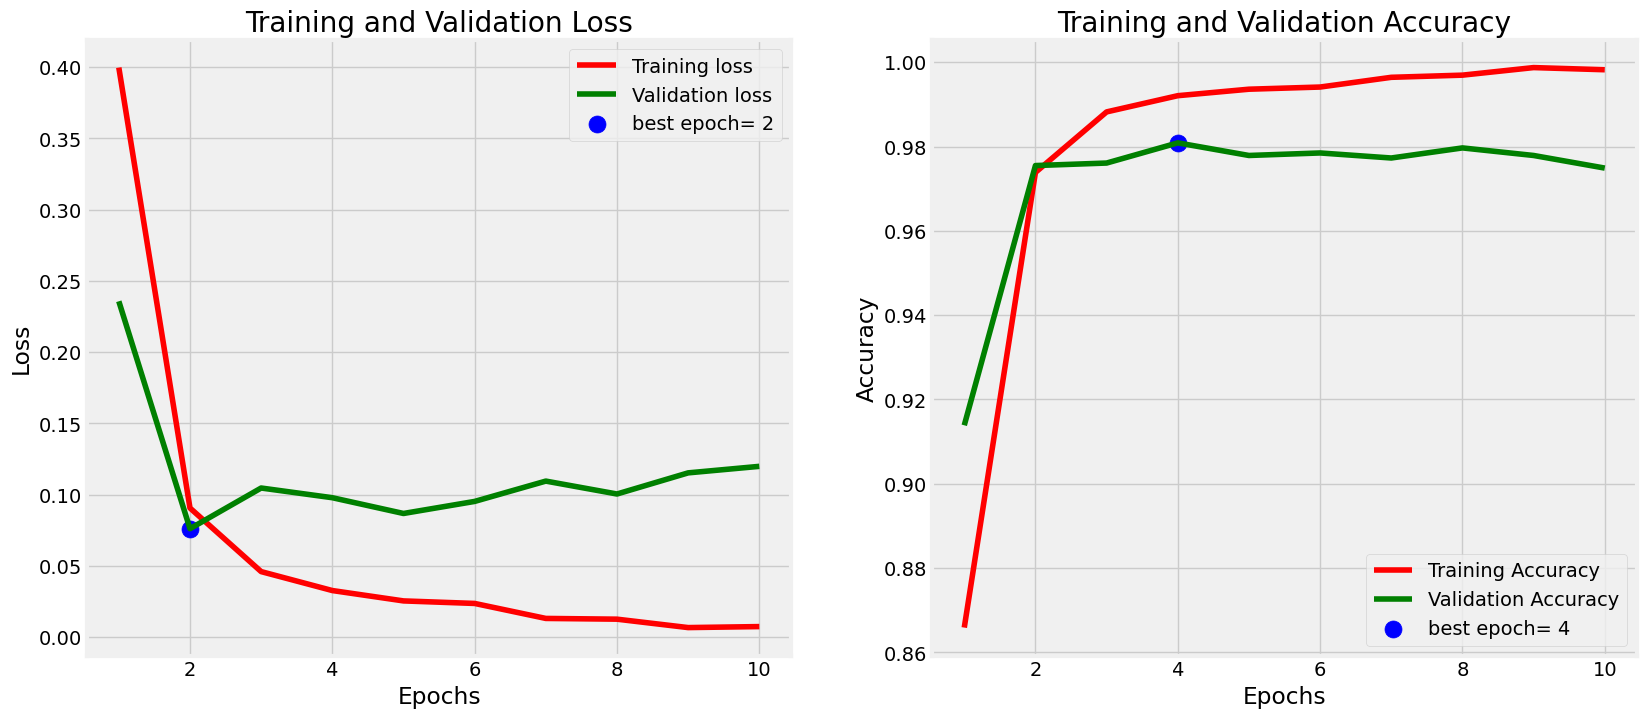

In [28]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

## Evaluating the Model

In [29]:
train_score = model.evaluate(training_padded, training_labels, verbose= 1)
valid_score = model.evaluate(testing_padded, testing_labels, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])

53/53 [==============================] - 2s 33ms/step - loss: 0.1198 - accuracy: 0.9749
Train Loss:  0.004593378398567438
Train Accuracy:  0.9992307424545288
--------------------
Validation Loss:  0.1198442280292511
Validation Accuracy:  0.9748803973197937


## Making Predictions

In [30]:
def predict_sentiment(message):
    sequences = tokenizer.texts_to_sequences(message)
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    pred_label = model.predict(padded)
    if pred_label > 0.5:
        print("It is not spam")
    else:
        print("This is spam. Ignore!!")

In [31]:
predict_sentiment(["Call this number 45670 to win this new fridge absolutely free"])

1/1 [==============================] - 2s 2s/step
This is spam. Ignore!!


In [32]:
predict_sentiment(["James is a good guy"])

1/1 [==============================] - 0s 30ms/step
It is not spam


In [33]:
predict_sentiment(["David needs to get me more free stuff or else I will claim it"])

1/1 [==============================] - 0s 31ms/step
It is not spam


In [43]:
predict_sentiment(["You have some points to claim. text WIN to 3245 to claim them now"])

1/1 [==============================] - 0s 23ms/step
This is spam. Ignore!!
